## Loading the Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Cleaning the Data

In [2]:
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())


Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())


0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [4]:
df[['Glucose','BloodPressure','SkinThickness',
    'Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
    df[['Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)


In [5]:
df.fillna(df.mean(), inplace = True)   # replace NaN with the mean


In [6]:
print(df.eq(0).sum())


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


## Examining the Correlation Between the Features

In [7]:
corr = df.corr()
print(corr)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

## Plotting the Correlation Between Features

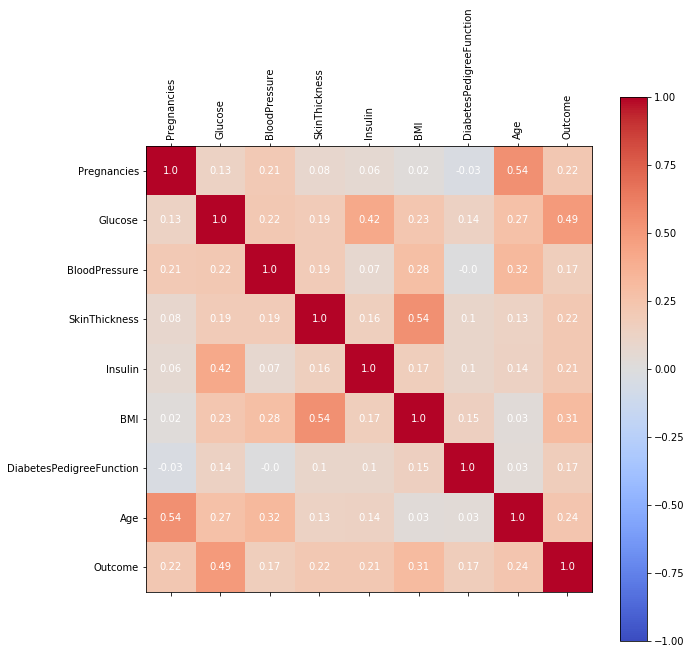

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
cax     = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)

ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)

ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)

#---print the correlation factor---
for i in range(df.shape[1]):
    for j in range(9):
        text = ax.text(j, i, round(corr.iloc[i][j],2),
                       ha="center", va="center", color="w")

plt.show()


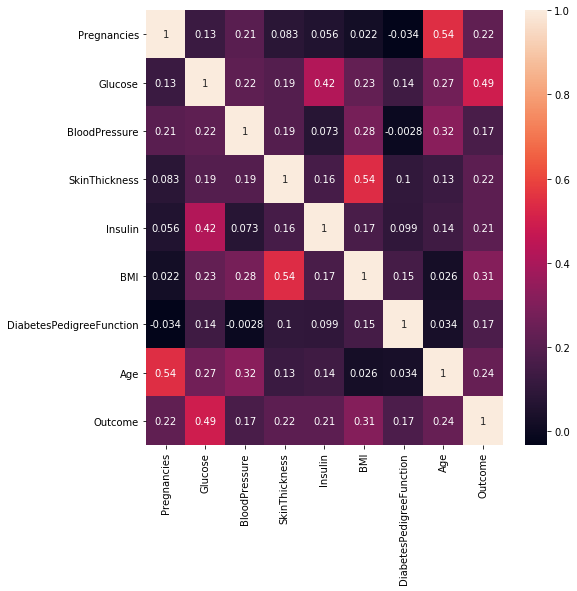

In [9]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)


In [10]:
#---get the top four features that has the highest correlation---
print(df.corr().nlargest(4, 'Outcome').index)

#---print the top 4 correlation values---
print(df.corr().nlargest(4, 'Outcome').values[:,8])


Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')
[1.         0.49292767 0.31192439 0.23835598]


## Evaluating the Algorithms

### Logistic Regression

In [11]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

#---features---
X = df[['Glucose','BMI','Age']]

#---label---
y = df.iloc[:,8]

log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10, scoring='accuracy').mean()

print(log_regress_score)


0.7617737525632263


In [12]:
result = []
result.append(log_regress_score)


### K-Nearest Neighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier

#---empty list that will hold cv (cross-validates) scores---
cv_scores = []

#---number of folds---
folds = 10

#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))

#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)

#---get the maximum score---
knn_score = max(cv_scores)

#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]

print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)


The optimal number of neighbors is 19
0.7721462747778537


### Support Vector Machines

In [14]:
from sklearn import svm

linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
                                   cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)


0.7656527682843473


In [15]:
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)


0.6353725222146275


### Selecting the Best Performing Algorithm

In [16]:
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)


,Accuracy
K Nearest Neighbors,0.772146
SVM Linear Kernel,0.765653
Logistic Regression,0.761774
SVM RBF Kernel,0.635373


## Training and Saving the Model

In [17]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [18]:
import pickle

#---save the model to disk---
filename = 'diabetes.sav'

#---write to the file using write and binary mode---
pickle.dump(knn, open(filename, 'wb'))


In [19]:
#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb'))


In [20]:
Glucose = 65
BMI = 70
Age = 50

prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
    print("Non-diabetic")
else:
    print("Diabetic")


[0]
Non-diabetic


In [21]:
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")


[[0.94736842 0.05263158]]
Confidence: 94.74%


# Deploying the Model

Save the following in a file named REST_API.py and run it as

`$ python REST_API.py`

In [ ]:
import pickle
from flask import Flask, request, json, jsonify
import numpy as np

app = Flask(__name__)

#---the filename of the saved model---
filename = 'diabetes.sav'

#---load the saved model---
loaded_model = pickle.load(open(filename, 'rb'))

@app.route('/diabetes/v1/predict', methods=['POST'])
def predict():
    #---get the features to predict---
    features = request.json

    #---create the features list for prediction---
    features_list = [features["Glucose"],
                     features["BMI"],
                     features["Age"]]

    #---get the prediction class---
    prediction = loaded_model.predict([features_list])

    #---get the prediction probabilities---
    confidence = loaded_model.predict_proba([features_list])

    #---formulate the response to return to client---
    response = {}
    response['prediction'] = int(prediction[0])
    response['confidence'] = str(round(np.amax(confidence[0]) * 100 ,2))

    return  jsonify(response)

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)


## Testing the Model

Try the following on the Terminal/Command Prompt

`$ curl -H "Content-type: application/json" -X POST http://127.0.0.1:5000/diabetes/v1/predict -d '{"BMI":30, "Age":29,"Glucose":100 }'`


`$ curl -H "Content-type: application/json" -X POST http://127.0.0.1:5000/diabetes/v1/predict -d '{"BMI":65, "Age":29,"Glucose":150 }'`


# Creating the Client Application to Use the Model

In [ ]:
import json
import requests

def predict_diabetes(BMI, Age, Glucose):
    url = 'http://127.0.0.1:5000/diabetes/v1/predict'
    data = {"BMI":BMI, "Age":Age, "Glucose":Glucose}
    data_json = json.dumps(data)
    headers = {'Content-type':'application/json'}
    response = requests.post(url, data=data_json, headers=headers)
    result = json.loads(response.text)
    return result

if __name__ == "__main__":
    predictions = predict_diabetes(30,40,100)
    print("Diabetic" if predictions["prediction"] == 1 else "Not Diabetic")
    print("Confidence: " + predictions["confidence"] + "%")


Save the following in a file named Predict_Diabetes.py and run it as

`$ python Predict_Diabetes.py`

In [ ]:
import json
import requests

def predict_diabetes(BMI, Age, Glucose):
    url = 'http://127.0.0.1:5000/diabetes/v1/predict'
    data = {"BMI":BMI, "Age":Age, "Glucose":Glucose}
    data_json = json.dumps(data)
    headers = {'Content-type':'application/json'}
    response = requests.post(url, data=data_json, headers=headers)
    result = json.loads(response.text)
    return result

if __name__ == "__main__":
    BMI = input('BMI?')
    Age = input('Age?')
    Glucose = input('Glucose?')
    predictions = predict_diabetes(BMI,Age,Glucose)
    print("Diabetic" if predictions["prediction"] == 1 else "Not Diabetic")
    print("Confidence: " + predictions["confidence"] + "%")
